In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,scale
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.decomposition import PCA

import pickle
%matplotlib inline
import plotly.offline as py

In [2]:

data= pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There is No Null Values In this dataset

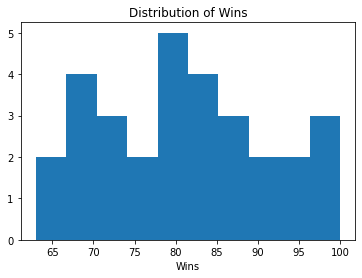

In [4]:
plt.hist(data['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In this Graph We can see That Most Teams have Number of Wins around 80.

In [5]:
attributes=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']

These are All the Attributes On Which We need to Work On.

In [21]:

y_data =data["W"]
X_data= data[attributes]

Defining Label and Training Data.

In [8]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_s=0
for r_s in range(40,90):
  x_train,x_test,y_train,y_test =train_test_split(X_data,y_data,test_size=.2, random_state=r_s)
  for i in model:
    i.fit(x_train,y_train)
    pre=i.predict(x_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.8732463116865629   For Random State  68  and model is  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


i Had apply differ Regressor Out Of Which Linear Regression Work well.

In [9]:
y_data= y_data.values.reshape(-1,1)


Reshaping The label For the Purpose of Classification

In [10]:
X_data_Sc = StandardScaler().fit_transform(X_data)
y_data_Sc= StandardScaler().fit_transform(y_data)

Scaling Data to get more Accuracy

In [11]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_s=0
for r_s in range(40,90):
  x_train,x_test,y_train,y_test =train_test_split(X_data_Sc,y_data_Sc,test_size=.2, random_state=r_s)
  for i in model:
    i.fit(x_train,y_train)
    pre=i.predict(x_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversion



Max Score is  0.8732463116865897   For Random State  68  and model is  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



As we can see their is not much improvement in the Accuracy Score So now we Will do PCA analysis of Data

In [13]:
pca =PCA(n_components =4)

In [16]:
X_PCA= pca.fit_transform(scale(X_data))

In [22]:
y_data =data["W"]

In [23]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_s=0
for r_s in range(40,90):
  x_train,x_test,y_train,y_test =train_test_split(X_PCA,y_data,test_size=.2, random_state=r_s)
  for i in model:
    i.fit(x_train,y_train)
    pre=i.predict(x_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.9245301203807755   For Random State  72  and model is  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Now this is our **Best Model** i am able to get it after doing PCA anaylasis of data.

In [27]:
x_train,x_test,y_train,y_test =train_test_split(X_PCA,y_data,test_size=.2, random_state=72)
Best_model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Best_model.fit(x_train,y_train)
pre=Best_model.predict(x_test)
r2_sc= r2_score(y_test,pre)
print(r2_sc)



0.9245301203807755


In [28]:
filename = "Linear_Reg_PCA.pkl"
pickle.dump(Best_model, open('model.pkl', 'wb'))